# Inteligência artificial para otimização do fluxo cirúrgico

A crescente utilização da inteligência artificial tem trazido benefícios para diversas áreas. Esse processo não é diferente na área da saúde. Imagine ter o poder de prever e intervir no caso de uma parada cardíaca, ter diagnósticos mais eficientes e completos, ou mesmo aplicar medicações em pacientes internados de forma automática e sem erros.

A inteligência artificial leva a prestação de serviços de saúde a outro patamar, trazendo melhorias às operações hospitalares e às diversas especialidades clínicas. Algumas inovações, como a maior possibilidade de uso dos recursos computacionais, além da geração e o tratamento de dados em larga escala, permitem ganhos de qualidade e de eficiência nos tratamentos e nos cuidados oferecidos aos pacientes.

#### Definição do problema de negócios
Criar um modelo de previsão para obtém o tempo utilizado de uma cirurgia.

#### Obtenção de conhecimento sobre o assunto
Por ser tratar de um processo sobejo poderíamos levar meses em analise e estudo, na intenção de agilizar o processo foi utilizado o conhecimento do orientador direcionando em alguns pontos

#### Importância do processo de otmização
Centros cirúrgicos utilizam, em média, 38% de sua capacidade operacional, quanto mais horas um centro cirúrgico ficar ocioso, maior será o custo da hora de utilização deste, impactando diretamente no custo de todos os procedimentos cirúrgicos. Diante disso, é essencial otimizar a utilização das salas de cirurgia para minimizar a sua ociosidade, pois “mesmo com as luzes apagadas,” o centro cirúrgico tem custo elevado.

> Carnielo ressalta que o tempo de preparação e limpeza de sala cirúrgico deve ser visto como um pit stop da Fórmula 1: o mais rápido possível e sem prejuízo, obviamente, da qualidade. Assim como a Fórmula 1 que evolui, e muito, em 1950 o pit stop de um carro era de, aproximadamente, 60 segundos. Em 2013, rompeu-se a barreira dos 2 segundos com 1,923 segundos no pit stop de Mark Webber, no GP dos EUA.

#### Sobre a tecnologia aplicada
A regressão, em geral, tem como objectivo tratar de um valor que não se consegue estimar inicialmente.

A regressão linear é chamada "linear" porque se considera que a relação da resposta às variáveis é uma função linear de alguns parâmetros. Os modelos de regressão que não são uma função linear dos parâmetros se chamam modelos de regressão não-linear. Sendo uma das primeiras formas de análise regressiva a ser estudada rigorosamente, e usada extensamente em aplicações práticas. Isso acontece porque modelos que dependem de forma linear dos seus parâmetros desconhecidos, são mais fáceis de ajustar que os modelos não-lineares aos seus parâmetros, e porque as propriedades estatísticas dos estimadores resultantes são fáceis de determinar.

## Resumo

Trata-se do curso de trabalho em saúde no Centro Cirúrgico (CC) na fluidez do agendamento buscando auxiliar na gestão de agendamento de sala com o tempo de cirurgia.

Optou-se por pesquisa avaliativa, adaptada aos estudos qualitativos. Como ferramentas de analise, utilizou-se **Pandas**, **Seaborn** e **Matplotlib** para analise dos dados e **Regressão Linear** desenvolvimento do modelo. O cenário do CC escolhido foi o Hospital Israelista Albert Einstein onde o mesmo se propor a suprir os dados.

Identificou-se vários pontos de observação que será apresenta no decorrer do processo.

No dialogo juntamente o orientador foi definido algumas variável com o objetivo de focar nos dados e criação de um modelo de otimização.

Devido a sensibilidade dos dados não estarão disponível para download, com exceto os dados de criação dos modelo pois os referido foram anonimizado.



## Importação e investigação dos dados

Foram disponibilizadas dados em diversos arquivos, iremos afiliar em um único arquivo a fim de versar o alastramento da análise.

In [1]:
import pandas as pd
import glob

import warnings
warnings.filterwarnings("ignore")

data = []
for file in glob.glob("data/bruto/*.csv"):
    data.append(pd.read_csv(file, sep=';'))
    
df_bruto = pd.concat(data)
df_bruto.shape

(385026, 108)

Temos 385026 registros e 108 colunas.
<br />Iremos selecionar as colunas de interesse e reduzir para 38

In [2]:
df = df_bruto[['número caso','prontuario','passagem','idade','sexo','faixa_etaria_1','faixa_etaria_2','faixa_etaria_3','Cpf','tipo procedimento','hospital', 'tipo paciente','procedimento cirurgico','especialidade procedimento','especialidade da cirurgia','tecnica cirurgica','crm cirurgiao principal','especialidade cirurgiao principal 1','crm anestesista','data agendamento inicial','hora agendamento inicial','data agendamento final','hora agendamento final','data entrada sala','hora entrada sala','data inicio anestesia','hora inicio anestesia','data cirurgia inicial','hora cirurgia inicial','data cirurgia final','hora cirurgia final','data final anestesia','hora final anestesia','data saida sala','hora saida sala','eventos clinicos','Intercorrência_INTRA_OP','seq']].copy()
df.shape

(385026, 38)

### Limpeza dos dados

É importante entendemos por se tratar de um processo de otimização alguns eventos não devem fazer parte.
<br />Iremos criar duas função com o objetivo de retornar o percentual que os eventos tem representado e apresentar os dados em grafico.

In [3]:
import matplotlib.pyplot as plt

def fn_analise_eventos(total, evento) :
    return  "{0:.2%}".format(evento/total);

def fn_analise_eventos_grafico(evento, title) :
    plt.figure(figsize=(20,5))
    plt.bar(evento.index, evento.values)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

#### Analisando os eventos clínicos

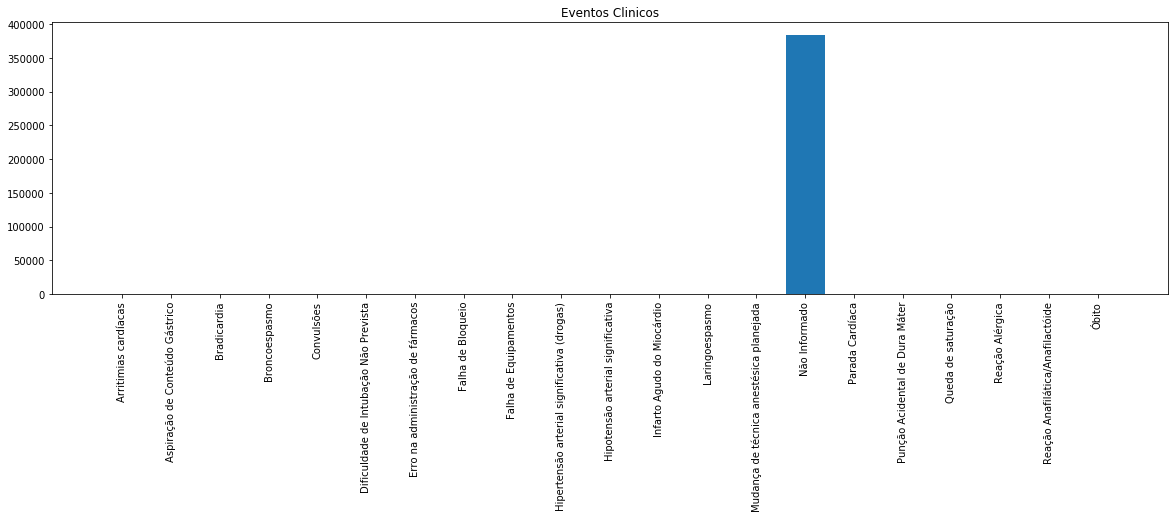

In [4]:
fn_analise_eventos_grafico(df.groupby('eventos clinicos').size(), 'Eventos Clinicos')

In [5]:
eventos_nao_informados = df.loc[df['eventos clinicos'] !='Não Informado'].groupby(['eventos clinicos']).size().values.sum()

resultado = fn_analise_eventos(df.shape[0], eventos_nao_informados)
print(eventos_nao_informados, resultado)

#removendo os dados
df = df[df['eventos clinicos'] =='Não Informado']

1664 0.43%


É possível observar que temos 1664 eventos que representa um percentual de 0.43% dos dados, sendo assim, os registros que tiveram eventos clínicos iremos remover do conjunto de dados.

#### Analisando intercorrências no decorrer da cirurgia


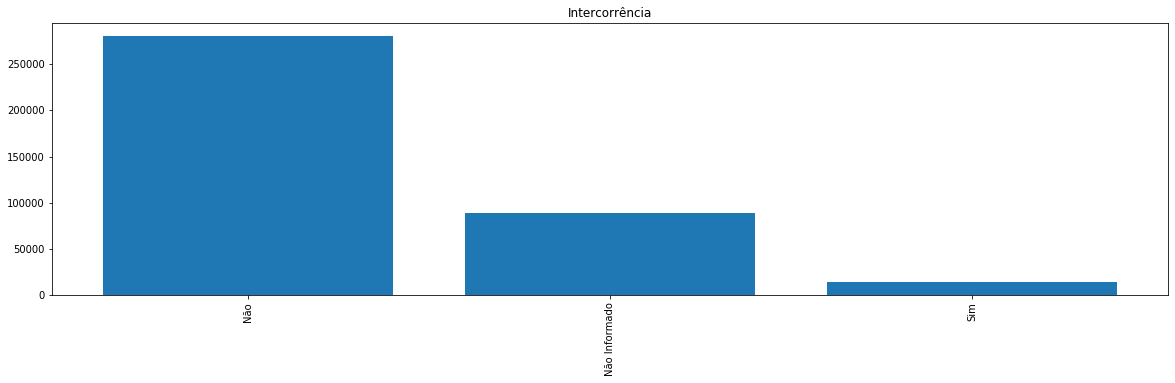

In [6]:
fn_analise_eventos_grafico(df.groupby('Intercorrência_INTRA_OP').size(), 'Intercorrência')

In [7]:
intercorrencias = df.loc[df['Intercorrência_INTRA_OP'] !='Não'].groupby(['Intercorrência_INTRA_OP']).size().values.sum()

resultado = fn_analise_eventos(df.shape[0], intercorrencias)
print(intercorrencias, resultado)

#removendo os dados
df = df[df['Intercorrência_INTRA_OP'] =='Não']


102761 26.81%


Temos 102761 intercorrências que representa um percentual de 26.81% dos dados, por mais este numero quase representa quase 1/4 dos dados não podemos considerar intercorrências, pois facilmente inviabilizaríamos a previsão contemplando intercorrências.

#### Analisando os hospitais

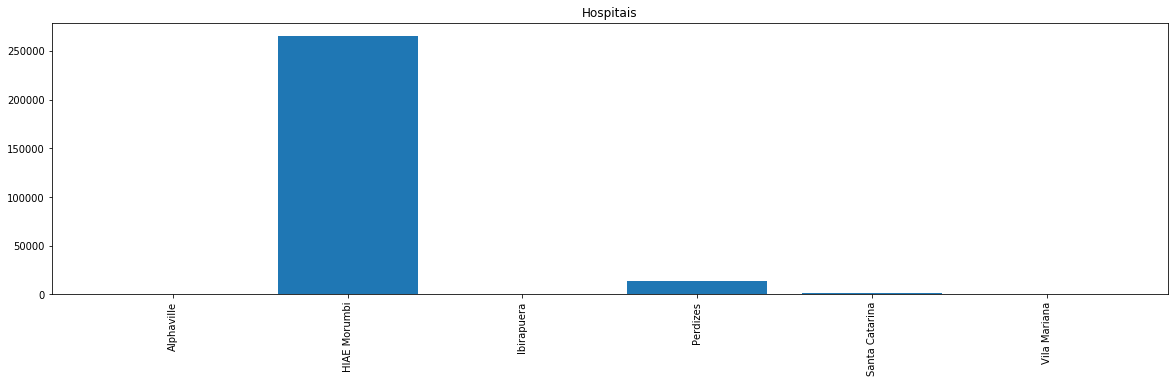

In [8]:
fn_analise_eventos_grafico(df.groupby('hospital').size(), 'Hospitais')

In [9]:
hospitais = df.loc[df['hospital'] !='HIAE Morumbi'].groupby(['hospital']).size().values.sum()

resultado = fn_analise_eventos(df.shape[0], hospitais)
print(hospitais, resultado)

#removendo os dados
df = df[df['hospital'] =='HIAE Morumbi']

14998 5.34%


Temos 102761 dados de outros hospitais que representa um percentual de 5.34%, como o nosso objetivo é Hospital Israelista Albert Einstein unidade Morumbi iremos manter os dados somente dos mesmo

#### Analisando tipo de procedimento

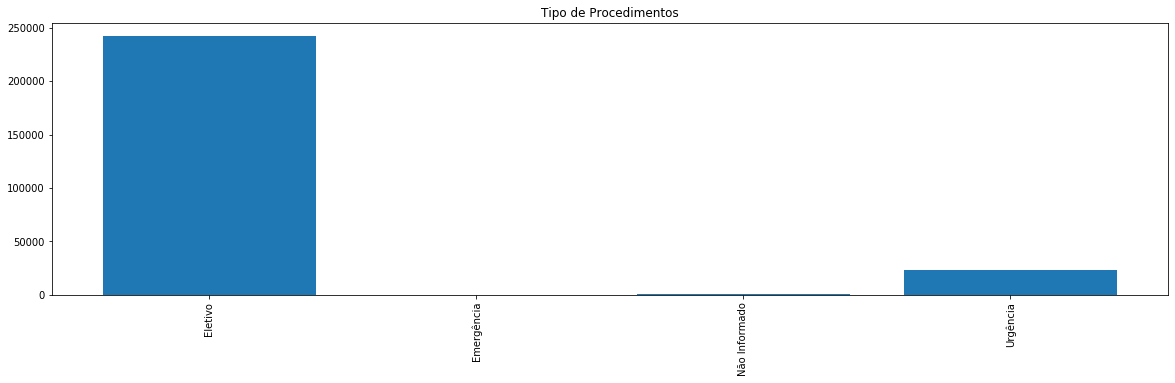

In [10]:
fn_analise_eventos_grafico(df.groupby('tipo procedimento').size(), 'Tipo de Procedimentos')

In [11]:
tipo_procedimento = df.loc[df['tipo procedimento'] !='Eletivo'].groupby(['tipo procedimento']).size().values.sum()

resultado = fn_analise_eventos(df.shape[0], tipo_procedimento)
print(tipo_procedimento, resultado)

#removendo os dados
df = df[df['tipo procedimento'] =='Eletivo']

23478 8.84%


Procedimentos não eletivos podem atrapalhar na performance de nossos dados, sendo assim iremos remover todos os tipo de procedimentos que não forem eletivos. Os tipos que não são eletivo representam 23478 que equivale a 8.84% dos dados.

#### Normalizando o cabeçalhos

A fim de propiciar manuseio de alguns dados iremos padronizar a terminologia de nossas colunas

In [12]:
from unicodedata import normalize

df.columns = [normalize('NFKD', x.lower().replace(' ','_')).encode('ASCII', 'ignore').decode('ASCII') for x in df.columns]

### Tratamento dos dados

Vamos trabalhar com as colunas de data, pois são elas que irão definir nossa TARGET

#### Removendo datas inválidas

In [13]:
headers = ['data_agendamento_inicial','data_agendamento_final','data_entrada_sala', 'data_inicio_anestesia', 
         'data_cirurgia_inicial', 'data_cirurgia_final', 'data_final_anestesia', 'data_saida_sala'
] 

for header in headers:
    df = df[df[header] != '01/01/1800']


#### Calculando o tempo

Para facilitar os cálculos iremos criar uma função utilizando as função datetime e coloca as data no padrão e retorna a diferença em minutos

In [14]:
import datetime

def fn_date_diff_in_minutes(data_inicial, hora_inicial, data_final, hora_final) :
    
    try:
        fmt = '%d/%m/%Y %H:%M:%S'
        diff = datetime.datetime.strptime(str(data_final + " " + hora_final), fmt) - datetime.datetime.strptime(str(data_inicial + " " + hora_inicial), fmt)
        if diff.days < 0 :
            return -1
        else :
            return diff.seconds / 60

    except Exception as e:
        return -1


Com o auxilio da função que acabamos de criar iremos gerar mais três novos registro em nosso dataset.

* **cirurgia_em_minutos:** intervalo em minutos entre data/hora da cirurgia inicial com cirúrgica final, deste forma temos o tempo da cirurgia 
* **agendamento_em_minutos:** intervalo em minutos entre data/hora da agendamento inicial com agendamento final, equivale ao tempo que foi sugerido no agendamento
* **diff_cirurgia_agendamento:** diferença do tempo da cirurgia com o tempo agendamento
* **tempo_anestesia_em_minutos:** intervalo em minutos entre a aplicação da anestesia e hora acabou o efeito 

In [15]:
df_tempo = []
for dt_inicial, hr_inicial, dt_final, hr_final in zip(df['data_cirurgia_inicial'], df['hora_cirurgia_inicial'],df['data_cirurgia_final'], df['hora_cirurgia_final']):
    df_tempo.append(fn_date_diff_in_minutes(dt_inicial, hr_inicial, dt_final, hr_final))
    
df['cirurgia_em_minutos'] = df_tempo

In [ ]:
df_tempo = []
for dt_inicial, hr_inicial, dt_final, hr_final in zip(df['data_agendamento_final'], df['hora_agendamento_inicial'],df['data_agendamento_final'], df['hora_agendamento_final']):
    df_tempo.append(fn_date_diff_in_minutes(dt_inicial, hr_inicial, dt_final, hr_final))
    
df['agendamento_em_minutos'] = df_tempo

df['diff_cirurgia_agendamento'] =  df['agendamento_em_minutos'] - df['cirurgia_em_minutos']

In [ ]:
df_tempo = []
for dt_inicial, hr_inicial, dt_final, hr_final in zip(df['data_inicio_anestesia'], df['hora_inicio_anestesia'],df['data_cirurgia_inicial'], df['hora_cirurgia_inicial']):
    df_tempo.append(fn_date_diff_in_minutes(dt_inicial, hr_inicial, dt_final, hr_final))
    
df['tempo_anestesia_em_minutos'] = df_tempo


Como é possível observar nossa função temos um tratamento de exceção quando o registro for inválido é declarado com -1, na intenção de melhorarmos o nosso dataset iremos considerar apenas o registro calculado que forem maior que 0

In [ ]:
columns = ['agendamento_em_minutos','cirurgia_em_minutos','tempo_anestesia_em_minutos']

for column in columns:
    df = df[df[column] > 0]
    

#### Limpeza de dados duplicados

Vamos utilizar uma função do pandas para identificar registro duplicado  e fazer a remoção

In [ ]:
#função que remove os duplicados
df.drop_duplicates()

print('Registros: {}'.format(df.shape[0]))

#### Removendo colunas que não iremos utilizar

In [ ]:
print('Total de colunas antes da remoção: {}'.format(df.shape[1]))

columns = ['numero_caso','prontuario','passagem', 'idade', 'faixa_etaria_1','faixa_etaria_2','faixa_etaria_3'
               ,'cpf', 'data_agendamento_inicial', 'hora_agendamento_inicial',
               'data_agendamento_final', 'hora_agendamento_final', 'data_entrada_sala',
               'hora_entrada_sala', 'data_inicio_anestesia', 'hora_inicio_anestesia',
               'data_cirurgia_inicial', 'hora_cirurgia_inicial', 'data_cirurgia_final',
               'hora_cirurgia_final', 'data_final_anestesia', 'hora_final_anestesia',
               'data_saida_sala', 'hora_saida_sala','tipo_procedimento','hospital','eventos_clinicos','intercorrencia_intra_op']
df.drop(columns,axis=1,inplace=True)

print('Total de colunas após da remoção : {}'.format(df.shape[1]))

##### Padronização dos dados

Nesta sessão iremos padronizar alguns registro diversos estão com informações em maiúsculo ou em minúsculo, isto é um problema no processo de normalização a mesma informação pode ser considerada como diferentes.

Para resolver iremos transformar as colunas do tipo string em caixa alta.

In [ ]:
columns = [
            'sexo', 'tipo_paciente', 'procedimento_cirurgico', 'especialidade_procedimento', 'tecnica_cirurgica', 
            'crm_cirurgiao_principal', 'especialidade_cirurgiao_principal_1', 'crm_anestesista',
            'especialidade_da_cirurgia'
          ]

for column in columns:
    df[column] = df[column].str.upper()

As colunas abaixo que estamos removendo do dataset foram analisadas e entendemos que são dados que atrapalha na qualidade do dado

In [ ]:
df = df[df['sexo'] != 'DESCONHECIDO']
df = df[df['tecnica_cirurgica'] != 'NÃO INFORMADO']
df = df[df['especialidade_cirurgiao_principal_1'] != 'NÃO INFORMADO']
df = df[df['especialidade_procedimento'] != 'NÃO INFORMADO']
df = df[df['procedimento_cirurgico'] != 'NÃO INFORMADO']

Alguns profissionais não estão com os dados preenchidos então iremos remover

In [ ]:
df["crm_anestesista_length"]= df["crm_anestesista"].str.len() 
df = df[df['crm_anestesista_length'] > 0]

df["crm_cirurgiao_principal_length"]= df["crm_cirurgiao_principal"].str.len() 
df = df[df['crm_cirurgiao_principal_length'] > 0]

df.drop(['crm_anestesista_length','crm_cirurgiao_principal_length'],axis=1,inplace=True)


#### Preparandos os dados para o modelo

In [ ]:
df_final = df[['sexo', 'tipo_paciente', 'procedimento_cirurgico',
       'especialidade_procedimento', 
       'tecnica_cirurgica', 'crm_cirurgiao_principal',
       'especialidade_cirurgiao_principal_1', 'crm_anestesista',
       'cirurgia_em_minutos']].copy()

Analisando os tipo de variáveis que temos em nosso modelo

In [ ]:
df_final.info()

**Observamos que nossa variável target é a única float, sendo assim iremos separar as colunas**

In [ ]:
col_X = [x for x in df_final.columns if df_final[x].dtype == 'object']
col_Y = ['cirurgia_em_minutos']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

oe = OrdinalEncoder()
oe.fit(df_final[col_X])
tb_X = oe.transform(df_final[col_X])
tb_X = pd.DataFrame(tb_X,columns=col_X)

col_INT = [x for x in df_final.columns if df_final[x].dtype != 'object']

df_modelo = pd.concat([tb_X.reset_index(drop=True),df_final[col_INT].reset_index(drop=True)], axis=1)
# df_modelo.to_csv('data/df_modelo.csv', index=False, sep=';')

Com a transformação podemos apresentar os dados e disponibilizar o dataset, transformamos com a técnica **OrdinalEncoder**, está transformação é utilizado para os modelos e uma forma de anonimizar os dados

Como este projeto é de conclusão de curso, devemos tomar cuidado com os dados, pois o mesmo irão a publico. É possivel reverter o processo de transformação.

Com os dados anonimizado iremos fazer alguns analise

In [ ]:
df_modelo.head()

#### Histograma


In [ ]:
import seaborn as sns
from scipy import stats

fig, ax = plt.subplots(4, 2, figsize = (16, 16))
sns.distplot(df_modelo['sexo'], bins = 20, fit = stats.norm, ax = ax[0, 0])
sns.distplot(df_modelo['tipo_paciente'], bins = 20, fit = stats.norm, ax = ax[0, 1])
sns.distplot(df_modelo['procedimento_cirurgico'], bins = 20, fit = stats.norm, ax = ax[1, 0])
sns.distplot(df_modelo['especialidade_procedimento'], bins = 20, fit = stats.norm, ax = ax[1, 1])
sns.distplot(df_modelo['tecnica_cirurgica'], bins = 20, fit = stats.norm, ax = ax[2, 0])
sns.distplot(df_modelo['crm_cirurgiao_principal'], bins = 20, fit = stats.norm, ax = ax[2, 1])
sns.distplot(df_modelo['especialidade_cirurgiao_principal_1'], bins = 20, fit = stats.norm, ax = ax[3, 0])
sns.distplot(df_modelo['crm_anestesista'], bins = 20, fit = stats.norm, ax = ax[3, 1])

Avaliando a distribuição de todo atributo através de histograma é possível verificar se os referência estão em distribuição despretensioso ou não, além da identificação de outliers

#### Outliers

Vamos utilizar uma tecnica de analise de dados chamado outliers.

In [ ]:
def fn_analise_outliers(x, _figsize):
    plt.figure(figsize=_figsize)
    plt.xticks(rotation=90)
    sns.boxplot(x=x,y=df_modelo['cirurgia_em_minutos'])


In [ ]:
fn_analise_outliers(df_modelo['sexo'], (5,5))

In [ ]:
fn_analise_outliers(df_modelo['tipo_paciente'], (5,5))

In [ ]:
fn_analise_outliers(df_modelo['tecnica_cirurgica'], (15,5))

In [ ]:
fn_analise_outliers(df_modelo['especialidade_procedimento'], (20,5))

In [ ]:
fn_analise_outliers(df_modelo['especialidade_cirurgiao_principal_1'], (20,5))

Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

E como é possível observar todos os dados estão com vários outliers. Possivelmente o nosso modelo irá performa muito mal, podemos utilizar tecnica de clusterização dividir os dados em grupos e vários modelos, desta forma teríamos modelos com a perfomance de forma aceitável e em grupos.

A clusterização envolve agrupar textos em grupos que mais façam sentido

#### Coorelação

In [ ]:
import numpy as np 

correlations = df_modelo.corr()
k = 9
cols = correlations.nlargest(k, "cirurgia_em_minutos")["cirurgia_em_minutos"].index
cm = np.corrcoef(df_modelo[cols].values.T)
sns.set(font_scale = 1.25)
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.heatmap(cm, vmin = -1, vmax = 1, cmap = "Reds", cbar = True, annot = True, square = False, 
                 fmt = ".3f", annot_kws = {"size": 12}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

Como era previsto nos outliers a analise de coorelação comprova que nossa target se relaciona muito mal as demais

##### Analise dos dados utilizando gráfico de violino

O gráfico de violino é semelhante ao box plot, exceto que ele também mostra a densidade de probabilidade dos dados em valores diferentes.

É mais informativo, pois enquanto um box plot mostra apenas estatísticas resumidas, como médias / medianas e intervalos interquartis, o gráfico de violino mostra a distribuição completa dos dados. Um gráfico de violino mostra claramente a presença de diferentes picos, sua posição e amplitude relativa. Essas informações não podem ser representadas com um box plot que apenas relata estatísticas de resumo. A parte interna de um gráfico de violino geralmente mostra a média (ou mediana) e o intervalo interquartílico.

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (16, 16))

sns.violinplot(x = 'sexo', data = df_modelo, ax = ax[0, 0], palette = "Set3")
sns.violinplot(x = 'tipo_paciente', data = df_modelo, ax = ax[0, 1], palette = "Set3")
sns.violinplot(x = 'procedimento_cirurgico', data = df_modelo, ax = ax[1, 0], palette = "Set3")
sns.violinplot(x = 'especialidade_procedimento', data = df_modelo, ax = ax[1, 1], palette = "Set3")
sns.violinplot(x = 'tecnica_cirurgica', data = df_modelo, ax = ax[2, 0], palette = "Set3")
sns.violinplot(x = 'crm_cirurgiao_principal', data = df_modelo, ax = ax[2, 1], palette = "Set3")
sns.violinplot(x = 'especialidade_cirurgiao_principal_1', data = df_modelo, ax = ax[3, 0], palette = "Set3")
sns.violinplot(x = 'crm_anestesista', data = df_modelo, ax = ax[3, 1], palette = "Set3")

plt.show()

### Criação do modelo

Vamos separar os dados e treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X = df_modelo[['sexo', 'tipo_paciente', 'procedimento_cirurgico',
       'especialidade_procedimento', 
       'tecnica_cirurgica', 'crm_cirurgiao_principal',
       'especialidade_cirurgiao_principal_1', 'crm_anestesista']]


y = df_modelo[['cirurgia_em_minutos']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [ ]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, r2_score, mean_squared_error

result = regressor.score(X_test, y_test)
print("Acurácia: %.2f%%" % (result * 100.0))


A função mean_absolute_error calcula o erro absoluto médio, uma métrica de risco correspondente ao valor esperado da perda de erro absoluta ou perda -norm.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Erro absoluto médio: %.2f%%" % mae)

## Conclusão

Como podemos ver na analise de dados o nosso modelo teve uma perfomance muito ruim sendo 14.35%, poderíamos até assegurar pois que é um numero relativamente baixo, porém analisando alguns dados de forma isolada podemos ver que existe excessivamente outliers em algumas colunas como **especialidade_cirurgiao_principal_1**, **especialidade_procedimento** e **tecnica_cirurgica**. É possível melhorar o desempenho do nosso modelo criamos grupos e sub grupos dos dados utilizando técnicas de clusterização que obtém semelhança entre os dados melhorando a correlação e diminuindo o numero de outliers.

Seria errado julgamos a qualidade dos dados como ruim, o mais justo e correto é afirmar que os dados possui muitas variações desafiando a criação de N modelos para atender a necessidade ao invés de um único modelo. 

## Referências

* https://saudebusiness.com/hospital/centros-cirurgicos-utilizam-em-media-38-de-sua-capacidade-operacional/
* http://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf
* https://pandas.pydata.org/docs/user_guide/index.html
* https://matplotlib.org/3.2.1/contents.html
* https://scikit-learn.org/stable/